<a href="https://colab.research.google.com/github/Ali-Saud/ML-in-PE/blob/master/Nestor-LSTM-17-aug.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [200]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [201]:
df = pd.read_csv('nasdaq-21-y.csv')
print(df.head())

         Date         Open         High  ...        Close    Adj Close      Volume
0  2000-08-16  3878.580078  3914.840088  ...  3861.199951  3861.199951  1401380000
1  2000-08-17  3858.879883  3947.050049  ...  3940.870117  3940.870117  1440370000
2  2000-08-18  3958.699951  3980.260010  ...  3930.340088  3930.340088  1447920000
3  2000-08-21  3966.229980  3985.620117  ...  3953.149902  3953.149902  1269330000
4  2000-08-22  3970.159912  4011.149902  ...  3958.209961  3958.209961  1413190000

[5 rows x 7 columns]


In [202]:
print(df.tail(15))

            Date          Open  ...     Adj Close      Volume
5267  2021-07-26  14821.030273  ...  14840.709961  4409960000
5268  2021-07-27  14807.950195  ...  14660.580078  4300000000
5269  2021-07-28  14715.660156  ...  14762.580078  4235390000
5270  2021-07-29  14771.169922  ...  14778.259766  3904590000
5271  2021-07-30  14615.849609  ...  14672.679688  3628750000
5272  2021-08-02  14758.599609  ...  14681.070313  3738200000
5273  2021-08-03  14713.990234  ...  14761.290039  4117520000
5274  2021-08-04  14747.209961  ...  14780.530273  4319400000
5275  2021-08-05  14794.080078  ...  14895.120117  4087320000
5276  2021-08-06  14864.219727  ...  14835.759766  4159050000
5277  2021-08-09  14855.759766  ...  14860.179688  4095760000
5278  2021-08-10  14887.750000  ...  14788.089844  3978790000
5279  2021-08-11  14834.379883  ...  14765.139648  3980530000
5280  2021-08-12  14751.360352  ...  14816.259766  4020260000
5281  2021-08-13  14825.070313  ...  14822.900391  4038130000

[15 row

In [203]:
cols = list(df)[1:7]
#Date and volume columns are not used in training. 
print(cols) #['Open', 'High', 'Low', 'Close', 'Adj Close']

['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']


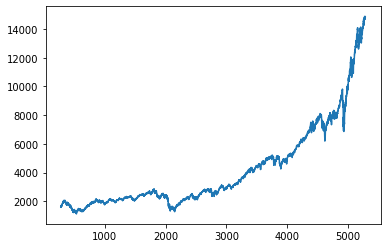

In [204]:
#New dataframe with only training data - 5 columns
df_for_training = df[cols].astype(float)

df_for_plot=df_for_training['Close'].tail(5000)
df_for_plot.plot.line()

#LSTM uses sigmoid and tanh that are sensitive to magnitude so values need to be normalized
# normalize the dataset
scaler = StandardScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)

In [205]:
#As required for LSTM networks, we require to reshape an input data into n_samples x timesteps x n_features. 
#In this example, the n_features is 5. We will make timesteps = 14 (past days data used for training). 

#Empty lists to be populated using formatted training data
trainX = []
trainY = []

n_future = 1   # Number of days we want to look into the future based on the past days.
n_past = 5  # Number of past days we want to use to predict the future.

#Reformat input data into a shape: (n_samples x timesteps x n_features)
#In my example, my df_for_training_scaled has a shape (12823, 5)
#12823 refers to the number of data points and 5 refers to the columns (multi-variables).
for i in range(n_past, len(df_for_training_scaled) - n_future +1):
    trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
    trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, 0])

trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

trainX shape == (5277, 5, 6).
trainY shape == (5277, 1).


In [206]:
# define the Autoencoder model

model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 5, 64)             18176     
_________________________________________________________________
lstm_9 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dropout_4 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 30,625
Trainable params: 30,625
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
60/60 [==============================] - 3s 12ms/step - loss: 0.1638 - val_loss: 1.3229
Epoch 2/10
60/60 [==============================] - 0s 7ms/step - loss: 0.0166 - val_loss: 0.5278
Epoch 3/10
60/60 [==============================] - 0s 7ms/step - loss: 0.0132 - val_loss: 0.3880
Epoch 4/10
60/60 [==============================] - 0s 7ms/step - loss: 0.0114 - val_loss: 0.1941
Epoch 5/10
60/60 [==============================] - 0s 7ms/step - loss: 0.0110 - val_loss: 0.1836
Epoch 6/10
60/60 [==============================] - 0s 7ms/step - loss: 0.0109 - val_loss: 0.0711
Epoch 7/10
60/60 [==============================] - 0s 8ms/step - loss: 0.0109 - val_loss: 0.0818
Epoch 8/10
60/60 [==============================] - 0s 7ms/step - loss: 0.0103 - val_loss: 0.0115
Epoch 9/10
60/60 [==============================] - 0s 8ms/step - loss: 0.0108 - val_loss: 0.0075
Epoch 10/10
60/60 [==============================] - 0s 7ms/step - loss: 0.0099 - val_loss: 0.0151


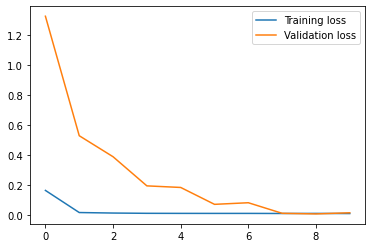

In [207]:
# fit the model
history = model.fit(trainX, trainY, epochs=10, batch_size=80, validation_split=0.1, verbose=1)

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [208]:
print(history.history['loss'])
#print(history.history['acc'])

[0.16384939849376678, 0.01664726994931698, 0.013233592733740807, 0.011444944888353348, 0.011022503487765789, 0.010881759226322174, 0.010899780318140984, 0.010331104509532452, 0.010764146223664284, 0.009940322488546371]


In [209]:
#Predicting...
#Libraries that will help us extract only business days in the US.
#Otherwise our dates would be wrong when we look back (or forward).  
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay
us_bd = CustomBusinessDay(calendar=USFederalHolidayCalendar())
train_dates = pd.to_datetime(df['Date'])
#Remember that we can only predict one day in future as our model needs 5 variables
#as inputs for prediction. We only have all 5 variables until the last day in our dataset.
n_past = 30
n_days_for_prediction=30 #let us predict past 15 days

predict_period_dates = pd.date_range(list(train_dates)[-n_past], periods=n_days_for_prediction, freq=us_bd).tolist()
print(predict_period_dates)

[Timestamp('2021-07-02 00:00:00', freq='C'), Timestamp('2021-07-06 00:00:00', freq='C'), Timestamp('2021-07-07 00:00:00', freq='C'), Timestamp('2021-07-08 00:00:00', freq='C'), Timestamp('2021-07-09 00:00:00', freq='C'), Timestamp('2021-07-12 00:00:00', freq='C'), Timestamp('2021-07-13 00:00:00', freq='C'), Timestamp('2021-07-14 00:00:00', freq='C'), Timestamp('2021-07-15 00:00:00', freq='C'), Timestamp('2021-07-16 00:00:00', freq='C'), Timestamp('2021-07-19 00:00:00', freq='C'), Timestamp('2021-07-20 00:00:00', freq='C'), Timestamp('2021-07-21 00:00:00', freq='C'), Timestamp('2021-07-22 00:00:00', freq='C'), Timestamp('2021-07-23 00:00:00', freq='C'), Timestamp('2021-07-26 00:00:00', freq='C'), Timestamp('2021-07-27 00:00:00', freq='C'), Timestamp('2021-07-28 00:00:00', freq='C'), Timestamp('2021-07-29 00:00:00', freq='C'), Timestamp('2021-07-30 00:00:00', freq='C'), Timestamp('2021-08-02 00:00:00', freq='C'), Timestamp('2021-08-03 00:00:00', freq='C'), Timestamp('2021-08-04 00:00:00'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


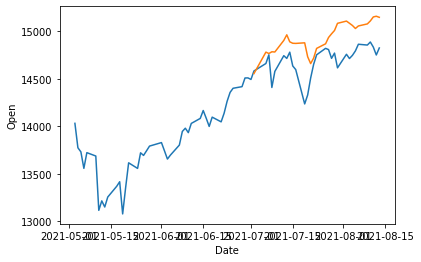

In [210]:
#Make prediction
prediction = model.predict(trainX[-n_days_for_prediction:]) #shape = (n, 1) where n is the n_days_for_prediction

#Perform inverse transformation to rescale back to original range
#Since we used 5 variables for transform, the inverse expects same dimensions
#Therefore, let us copy our values 5 times and discard them after inverse transform
prediction_copies = np.repeat(prediction, df_for_training.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(prediction_copies)[:,0]


# Convert timestamp to date
forecast_dates = []
for time_i in predict_period_dates:
    forecast_dates.append(time_i.date())
    
df_forecast = pd.DataFrame({'Date':np.array(forecast_dates), 'Open':y_pred_future})
df_forecast['Date']=pd.to_datetime(df_forecast['Date'])


original = df[['Date', 'Open']]
original['Date']=pd.to_datetime(original['Date'])
original = original.loc[original['Date'] >= '2021-5-1']

sns.lineplot(original['Date'], original['Open'])
sns.lineplot(df_forecast['Date'], df_forecast['Open'])

In [211]:
original.tail(65)

,Date,Open
5217,2021-05-13,13150.940430
5218,2021-05-14,13255.650391
5219,2021-05-17,13368.799805
5220,2021-05-18,13416.900391
5221,2021-05-19,13078.190430
...,...,...
5277,2021-08-09,14855.759766
5278,2021-08-10,14887.750000
5279,2021-08-11,14834.379883
5280,2021-08-12,14751.360352


In [212]:
df_forecast

,Date,Open
0,2021-07-02,14555.598633
1,2021-07-06,14781.197266
2,2021-07-07,14766.738281
3,2021-07-08,14784.903320
4,2021-07-09,14782.634766
5,2021-07-12,14904.446289
6,2021-07-13,14963.459961
7,2021-07-14,14889.825195
8,2021-07-15,14874.585938
9,2021-07-16,14873.078125


In [219]:
original_open = original['Open'].loc[original['Date'] >= '2021-07-02']
riginal_open = original['Open'].loc[original['Date'] <= '2021-08-13']
original_open = original_open.to_numpy()
original_open

array([14582.980469, 14661.549805, 14753.410156, 14409.200195,
       14578.429688, 14743.860352, 14715.129883, 14780.900391,
       14635.780273, 14597.509766, 14235.980469, 14330.459961,
       14508.75    , 14652.719727, 14753.05957 , 14821.030273,
       14807.950195, 14715.660156, 14771.169922, 14615.849609,
       14758.599609, 14713.990234, 14747.209961, 14794.080078,
       14864.219727, 14855.759766, 14887.75    , 14834.379883,
       14751.360352, 14825.070313])

In [220]:
df_forecast_all = df_forecast
df_forecast = df_forecast.loc[df_forecast['Date'] <='2021-08-13']
df_forecast

,Date,Open
0,2021-07-02,14555.598633
1,2021-07-06,14781.197266
2,2021-07-07,14766.738281
3,2021-07-08,14784.903320
4,2021-07-09,14782.634766
5,2021-07-12,14904.446289
6,2021-07-13,14963.459961
7,2021-07-14,14889.825195
8,2021-07-15,14874.585938
9,2021-07-16,14873.078125


In [215]:
13618.640625/14771.50

0.9219538046237687

In [216]:
13574.999023/14715.129883

0.9225198235377343

In [221]:
direction = []
a = 14821.030273
for i in df_forecast['Open']:
  if (i==a):
    dir = 'Neutral'
    #print(dir)
  if (i< a):
    dir = 'Down'
    #print(dir)
  else:
    dir = 'Up'
    #print(dir)
  a = i
  direction.append(dir)
direction
  

['Down',
 'Up',
 'Down',
 'Up',
 'Down',
 'Up',
 'Up',
 'Down',
 'Down',
 'Down',
 'Up',
 'Down',
 'Down',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Down',
 'Down',
 'Down',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Down']

In [222]:
df_forecast['Actual Price'] = original_open
df_forecast

,Date,Open,Actual Price
0,2021-07-02,14555.598633,14582.980469
1,2021-07-06,14781.197266,14661.549805
2,2021-07-07,14766.738281,14753.410156
3,2021-07-08,14784.903320,14409.200195
4,2021-07-09,14782.634766,14578.429688
5,2021-07-12,14904.446289,14743.860352
6,2021-07-13,14963.459961,14715.129883
7,2021-07-14,14889.825195,14780.900391
8,2021-07-15,14874.585938,14635.780273
9,2021-07-16,14873.078125,14597.509766


In [223]:
df_forecast['Direction']= direction
df_forecast

,Date,Open,Actual Price,Direction
0,2021-07-02,14555.598633,14582.980469,Down
1,2021-07-06,14781.197266,14661.549805,Up
2,2021-07-07,14766.738281,14753.410156,Down
3,2021-07-08,14784.903320,14409.200195,Up
4,2021-07-09,14782.634766,14578.429688,Down
5,2021-07-12,14904.446289,14743.860352,Up
6,2021-07-13,14963.459961,14715.129883,Up
7,2021-07-14,14889.825195,14780.900391,Down
8,2021-07-15,14874.585938,14635.780273,Down
9,2021-07-16,14873.078125,14597.509766,Down


In [224]:
Accuracy = df_forecast['Open']/df_forecast['Actual Price']
Accuracy=np.array(Accuracy)
Accuracy

array([0.99812234, 1.00816063, 1.00090339, 1.02607384, 1.01400734,
       1.01089172, 1.01687583, 1.00736929, 1.01631657, 1.01887777,
       1.04518755, 1.02804941, 1.01046425, 1.00448462, 1.00457023,
       1.00322777, 1.00861123, 1.0175498 , 1.01610711, 1.03206734,
       1.02367628, 1.02523149, 1.02133262, 1.01595385, 1.01295247,
       1.01497946, 1.01489171, 1.02139265, 1.02763563, 1.02176489])

In [228]:
df_forecast['Accuracy'] = Accuracy
z = 1/Accuracy
df_forecast['Accuracy Inverse'] = (z)
df_forecast

,Date,Open,Actual Price,Direction,Accuracy,Accuracy Inverse
0,2021-07-02,14555.598633,14582.980469,Down,0.998122,1.001881
1,2021-07-06,14781.197266,14661.549805,Up,1.008161,0.991905
2,2021-07-07,14766.738281,14753.410156,Down,1.000903,0.999097
3,2021-07-08,14784.903320,14409.200195,Up,1.026074,0.974589
4,2021-07-09,14782.634766,14578.429688,Down,1.014007,0.986186
5,2021-07-12,14904.446289,14743.860352,Up,1.010892,0.989226
6,2021-07-13,14963.459961,14715.129883,Up,1.016876,0.983404
7,2021-07-14,14889.825195,14780.900391,Down,1.007369,0.992685
8,2021-07-15,14874.585938,14635.780273,Down,1.016317,0.983945
9,2021-07-16,14873.078125,14597.509766,Down,1.018878,0.981472


In [229]:
pred_first_dates = pd.to_datetime(predict_period_dates)
pred_first_dates

DatetimeIndex(['2021-07-02', '2021-07-06', '2021-07-07', '2021-07-08',
               '2021-07-09', '2021-07-12', '2021-07-13', '2021-07-14',
               '2021-07-15', '2021-07-16', '2021-07-19', '2021-07-20',
               '2021-07-21', '2021-07-22', '2021-07-23', '2021-07-26',
               '2021-07-27', '2021-07-28', '2021-07-29', '2021-07-30',
               '2021-08-02', '2021-08-03', '2021-08-04', '2021-08-05',
               '2021-08-06', '2021-08-09', '2021-08-10', '2021-08-11',
               '2021-08-12', '2021-08-13'],
              dtype='datetime64[ns]', freq=None)

In [230]:
original_open

array([14582.980469, 14661.549805, 14753.410156, 14409.200195,
       14578.429688, 14743.860352, 14715.129883, 14780.900391,
       14635.780273, 14597.509766, 14235.980469, 14330.459961,
       14508.75    , 14652.719727, 14753.05957 , 14821.030273,
       14807.950195, 14715.660156, 14771.169922, 14615.849609,
       14758.599609, 14713.990234, 14747.209961, 14794.080078,
       14864.219727, 14855.759766, 14887.75    , 14834.379883,
       14751.360352, 14825.070313])

In [231]:
actual_direction = []
#a = predict_period_dates[0]#14821.030273
a = 13078.190430
for i in original_open:
  print(i,a)
  if (i==a):
    dir = 'Neutral'
    #print(dir)
  if (i< a):
    dir = 'Down'
    #print(dir)
  else:
    dir = 'Up'
    #print(dir)
  a = i
  actual_direction.append(dir)
actual_direction

14582.980469 13078.19043
14661.549805 14582.980469
14753.410156 14661.549805
14409.200195 14753.410156
14578.429688 14409.200195
14743.860352000002 14578.429688
14715.129883000001 14743.860352000002
14780.900391 14715.129883000001
14635.780272999998 14780.900391
14597.509766 14635.780272999998
14235.980469 14597.509766
14330.459961000002 14235.980469
14508.75 14330.459961000002
14652.719727000002 14508.75
14753.05957 14652.719727000002
14821.030272999998 14753.05957
14807.950195 14821.030272999998
14715.660156 14807.950195
14771.169922 14715.660156
14615.849609 14771.169922
14758.599609 14615.849609
14713.990234 14758.599609
14747.209961000002 14713.990234
14794.080078 14747.209961000002
14864.219727000002 14794.080078
14855.759766 14864.219727000002
14887.75 14855.759766
14834.379883000001 14887.75
14751.360352000002 14834.379883000001
14825.070313 14751.360352000002


['Up',
 'Up',
 'Up',
 'Down',
 'Up',
 'Up',
 'Down',
 'Up',
 'Down',
 'Down',
 'Down',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Down',
 'Down',
 'Up',
 'Down',
 'Up',
 'Down',
 'Up',
 'Up',
 'Up',
 'Down',
 'Up',
 'Down',
 'Down',
 'Up']

In [232]:
df_forecast['Actual Direction'] = actual_direction
df_forecast

,Date,Open,Actual Price,Direction,Accuracy,Accuracy Inverse,Actual Direction
0,2021-07-02,14555.598633,14582.980469,Down,0.998122,1.001881,Up
1,2021-07-06,14781.197266,14661.549805,Up,1.008161,0.991905,Up
2,2021-07-07,14766.738281,14753.410156,Down,1.000903,0.999097,Up
3,2021-07-08,14784.903320,14409.200195,Up,1.026074,0.974589,Down
4,2021-07-09,14782.634766,14578.429688,Down,1.014007,0.986186,Up
5,2021-07-12,14904.446289,14743.860352,Up,1.010892,0.989226,Up
6,2021-07-13,14963.459961,14715.129883,Up,1.016876,0.983404,Down
7,2021-07-14,14889.825195,14780.900391,Down,1.007369,0.992685,Up
8,2021-07-15,14874.585938,14635.780273,Down,1.016317,0.983945,Down
9,2021-07-16,14873.078125,14597.509766,Down,1.018878,0.981472,Down


In [233]:
hits=0
misses = 0
for i in range(0, len(df_forecast)):
  if (df_forecast['Direction'][i] == df_forecast['Actual Direction'][i]):
    hits = hits +1
    print('Hit', hits)
  else:
    misses = misses +1
    print('Miss', misses)
accuracy_overall = hits/(hits+misses)
accuracy_overall

Miss 1
Hit 1
Miss 2
Miss 3
Miss 4
Hit 2
Miss 5
Miss 6
Hit 3
Hit 4
Miss 7
Miss 8
Miss 9
Hit 5
Hit 6
Hit 7
Miss 10
Miss 11
Hit 8
Miss 12
Hit 9
Hit 10
Miss 13
Miss 14
Hit 11
Miss 15
Hit 12
Miss 16
Miss 17
Miss 18


0.4

In [ ]:
a = 13618.640625/14771.50
b = 13666.833/ 14652.719727
c = 13674.233398/14330.459961

In [ ]:
a

In [ ]:
b

In [ ]:
c

In [ ]:
#samples_to_predict = ['2021-07-21']
# Convert into Numpy array
#samples_to_predict = np.array(samples_to_predict)

# Generate predictions for samples
#predictions = model.predict(trainX[samples_to_predict:])
#print(predictions)